In [35]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn import metrics

In [4]:
#import data
data=pd.read_csv('CarPrice.csv')

In [5]:
data.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [6]:
#generate discriptive statistics
data.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [8]:
#check data is null or not
data.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

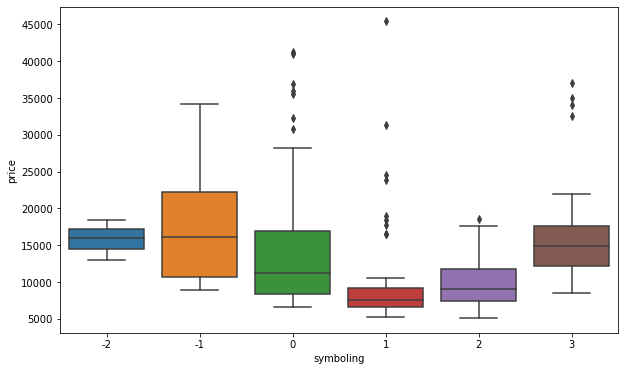

In [104]:
plt.figure(figsize=(10,6))
sns.boxplot(x='symboling',y='price',data=data)
plt.show()

In [110]:
#split the data into train and test
#train=75% and test=25%
train,test=train_test_split(data,test_size=0.25)

In [115]:
#split features and targets
train_x=train[['symboling','wheelbase','carlength','carwidth','carheight','curbweight','enginesize','boreratio','stroke','compressionratio','horsepower','peakrpm','citympg','highwaympg']]
train_y=train[['price']]

test_x=test[['symboling','wheelbase','carlength','carwidth','carheight','curbweight','enginesize','boreratio','stroke','compressionratio','horsepower','peakrpm','citympg','highwaympg']]
test_y=test[['price']]

In [112]:
train_x

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg
127,3,89.5,168.9,65.0,51.6,2756,194,3.74,2.900,9.5,207,5900,17,25
104,3,91.3,170.7,67.9,49.7,3071,181,3.43,3.270,9.0,160,5200,19,25
88,-1,96.3,172.4,65.4,51.6,2403,110,3.17,3.460,7.5,116,5500,23,30
129,1,98.4,175.7,72.3,50.5,3366,203,3.94,3.110,10.0,288,5750,17,28
137,2,99.1,186.6,66.5,56.1,2847,121,3.54,3.070,9.0,160,5500,19,26
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55,3,95.3,169.0,65.7,49.6,2380,70,3.33,3.255,9.4,101,6000,17,23
69,0,106.7,187.5,70.3,54.9,3495,183,3.58,3.640,21.5,123,4350,22,25
95,1,94.5,165.6,63.8,53.3,2028,97,3.15,3.290,9.4,69,5200,31,37
12,0,101.2,176.8,64.8,54.3,2710,164,3.31,3.190,9.0,121,4250,21,28


In [113]:
train_y

,price
127,34028.0
104,17199.0
88,9279.0
129,31400.5
137,18620.0
...,...
55,10945.0
69,28176.0
95,7799.0
12,20970.0


In [116]:
#Train model using decision tree regressor
model=DecisionTreeRegressor()
model.fit(train_x,train_y)

DecisionTreeRegressor()

In [117]:
#Predict data
predct=model.predict(test_x)

In [118]:
#compare test and train data
metrics.r2_score(predct,test_y)

0.9181843914386216

<AxesSubplot:xlabel='price'>

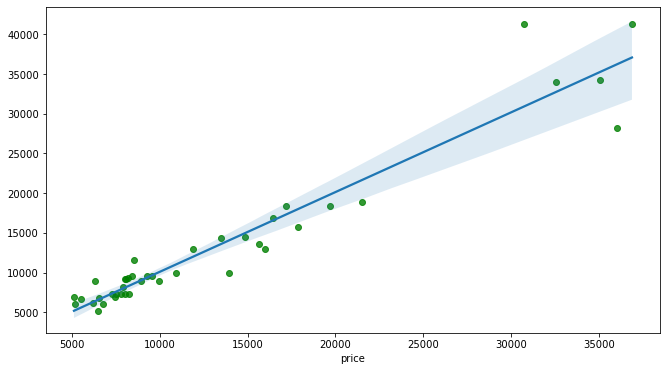

In [92]:
#Regression Graph
plt.figure(figsize=(11,6))
sns.regplot(x=test_y,y=predct,scatter_kws={'color':'green'})

In [99]:
test=np.array([[0,90.15,121.48,74.51,50.1,3100,170,3.5,3.2,9,150,5600,35,45]])
price=model.predict(test)
print(price)

[22625.]


C:\Users\rohan\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(
